# **Project Name**    - **UBER Supply Demand Analysis**

# **Project Summary**

Analyzed Uber trip data to identify supply-demand gaps based on time and pickup location.Found major shortages during Night and Early Morning at the Airport due to unavailability and cancellations.

To start with project here are few steps-

# 1) Understand the Problem Statement -

* When is the problem happening at which time period.

* What is the problem as riders are requesting trips, but uber is not assign drivers.

* Uber is not able to assign enough drivers to fulfill these requests.


* Where is the problem happening at pickup points.

* Why is this a problem are riders are stranded or delayed, also there is revenue loss as Uber misses out on trips.



# 2) Data Collection -

 We have given uber datasets

* **uber request data.csv**


**Request id** -		A unique identifier for each ride request made by a user.

**Pickup point**	- 	Indicates the pickup location of the trip

**Driver id** - 		Unique identifier for the driver assigned to the trip.

**Status** - 	Status of the trip.

**Request timestamp**	 - The date and time when the ride was requested

**Drop timestamp**	 - The date and time when the trip ended




# 3) Data Cleaning -

After this, check the data types, nulls values and than replace the null values, than remove the duplicate rows.

# 4) Data Analysis -

After cleaning  the datasets, do some Exploratory Data Analysis (EDA), Univariate, Bivariate, Multivariate Analysis with the datasets to extract the useful insights.


# 5) Data Visualisation -

For visualisation use histogram chart, box plot, line chart, bar chart, clustered column chart, pie chart, correlation heatmap and pairplot to visualise the dataset.







# **Github Link**

https://github.com/SainiBimal/Uber-Supply-Demand-Gaps

# **Problem Statement**

Uber is experiencing a significant supply-demand mismatch during specific time slots, particularly during Night and Early Morning hours, for trips originating from the Airport to the City. This gap is characterized by high rider demand but low cab availability due to two major factors:

Unavailability of cabs during Night hours, and

High ride cancellation rates by drivers during Early Morning and Morning time slots.

# **Data Wrangling**

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [106]:
# Load the dataset
uber = pd.read_csv("/content/drive/MyDrive/Uber Supply demand/Uber Request Data.csv")

In [107]:
uber.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [108]:
uber.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [109]:
# Checking data types
uber.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object


In [110]:
# Change the datatypes
uber["Request timestamp"] = pd.to_datetime(uber["Request timestamp"],format = "mixed")
uber["Drop timestamp"] = pd.to_datetime(uber["Drop timestamp"], format = "mixed")

In [111]:
uber.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,datetime64[ns]
Drop timestamp,datetime64[ns]


In [112]:
# Checking for Null Values
uber.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [113]:
# Imputing Null Values
uber["Driver id"] = uber["Driver id"].fillna("Driver not assign")
uber["Drop timestamp"] = uber["Drop timestamp"].fillna("")
uber["Drop timestamp"] = pd.to_datetime(uber["Drop timestamp"], format = "mixed")

In [114]:
uber.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,0
Status,0
Request timestamp,0
Drop timestamp,3914


In [115]:
# Checking For Duplicates
uber.duplicated().sum()

np.int64(0)

In [116]:
# Feature Engineering
uber["Date"] = pd.to_datetime(uber["Request timestamp"].dt.date)
uber["Hour"] = uber["Request timestamp"].dt.hour
uber["Minute"] = uber["Request timestamp"].dt.minute

uber.loc[(uber["Hour"]>=4) & (uber["Hour"]<8), "Time Period"] = "Early Morning"
uber.loc[(uber["Hour"]>=8) & (uber["Hour"]<12), "Time Period"] = "Morning"
uber.loc[(uber["Hour"]>=12) & (uber["Hour"]<16), "Time Period"] = "Afternoon"
uber.loc[(uber["Hour"]>=16) & (uber["Hour"]<19), "Time Period"] = "Evening"
uber.loc[(uber["Hour"]>=19) & (uber["Hour"]<24), "Time Period"] = "Night"
uber.loc[(uber["Hour"]>=0) & (uber["Hour"]<4), "Time Period"] = "Late Night"

In [117]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   object        
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Date               6745 non-null   datetime64[ns]
 7   Hour               6745 non-null   int32         
 8   Minute             6745 non-null   int32         
 9   Time Period        6745 non-null   object        
dtypes: datetime64[ns](3), int32(2), int64(1), object(4)
memory usage: 474.4+ KB


In [118]:
uber.shape

(6745, 10)

In [119]:
uber.describe()

,Request id,Request timestamp,Drop timestamp,Date,Hour,Minute
count,6745.000000,6745,2831,6745,6745.000000,6745.000000
mean,3384.644922,2016-09-04 08:49:18.446849536,2016-09-05 17:03:26.523843072,2016-09-03 19:22:02.045959936,12.956709,29.574351
min,1.000000,2016-07-13 00:00:24,2016-07-13 00:01:12,2016-07-13 00:00:00,0.000000,0.000000
25%,1691.000000,2016-07-14 07:38:26,2016-07-14 08:10:24.500000,2016-07-14 00:00:00,7.000000,14.000000
50%,3387.000000,2016-07-15 13:44:15,2016-07-15 15:27:41,2016-07-15 00:00:00,13.000000,30.000000
75%,5080.000000,2016-11-07 19:00:00,2016-11-07 19:25:30,2016-11-07 00:00:00,19.000000,45.000000
max,6766.000000,2016-12-07 23:54:00,2016-12-07 23:45:00,2016-12-07 00:00:00,23.000000,59.000000
std,1955.099667,NaN,NaN,NaN,6.504052,17.360326


In [120]:
# Export clean data for SQL and Excel

# from google.colab import files
# uber.to_csv("clean_uber.csv")
# files.download("clean_uber.csv")

The task that we are done above are


*   **Data Loading and Cleaning -** Load the dataset uber request data
*   **Handling and Imputing the Null Values -**

 Imputing driver id with "Driver not assign".

 Imputing drop timestamp as "".

*   **Handling the Duplicates -**

No duplicates values from the dataset.

*   **Export the Datasets -**

 Export the clean_uber.csv file SQL and Excel.


# **Data Visualization**

Data visualization was used to Analyzed Uber trip data to identify supply-demand gaps based on time and pickup location. Techniques like bar plots, pie charts, box plots, and scatter plots helped analyze genre popularity, rating distributions, and release trends. These visual tools made the data more intuitive and supported actionable insights.

In [121]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Hour,Minute,Time Period
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,51,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,57,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,17,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,8,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,33,Morning
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,Driver not assign,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23,49,Night
6741,6752,Airport,Driver not assign,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23,50,Night
6742,6751,City,Driver not assign,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23,52,Night
6743,6754,City,Driver not assign,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23,54,Night


# **Univariate Analysis**



Univariate analysis focuses on analyzing one variable at a time to understand its distribution, central tendency, and spread. It helps identify patterns, outliers, and frequency of individual variables.

# **Histogram Plot**

A histogram is a graphical representation that shows the distribution of a numerical variable by dividing the data into continuous intervals or bins.

**Histogram Plot of Hour**

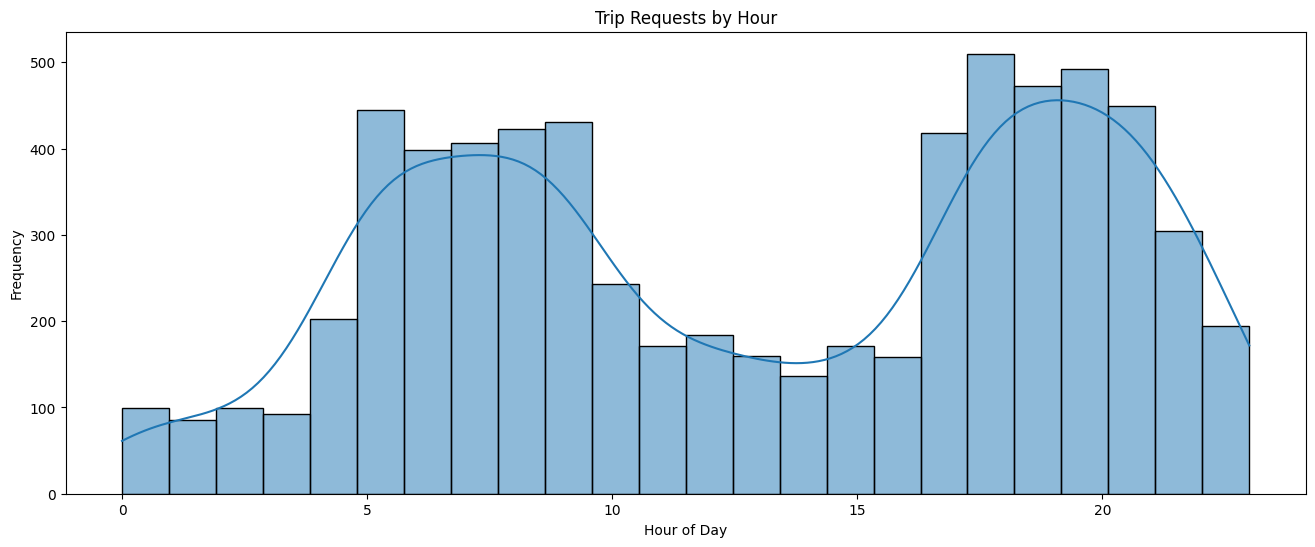

In [122]:
plt.figure(figsize=(16,6))
sns.histplot(uber['Hour'], bins=24, kde= True)
plt.title("Trip Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()


**Insights :**

*   The graph clearly shows two major peaks, indicating a bimodal pattern of trip demand. From 5 AM to 10 AM, from 5 PM to 9 PM.

In [123]:
Incomplete = uber[(uber["Status"]=="Cancelled") | (uber["Status"] == "No Cars Available")]
Incomplete

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Hour,Minute,Time Period
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,6,8,Early Morning
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17,7,Evening
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20,51,Night
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10,12,Morning
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,2016-12-07,19,14,Night
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,Driver not assign,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23,49,Night
6741,6752,Airport,Driver not assign,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23,50,Night
6742,6751,City,Driver not assign,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23,52,Night
6743,6754,City,Driver not assign,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23,54,Night


In [124]:
Complete = uber[(uber["Status"]=="Trip Completed")]
Complete

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Date,Hour,Minute,Time Period
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,51,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,57,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,17,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,8,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,33,Morning
...,...,...,...,...,...,...,...,...,...,...
2826,1315,Airport,300.0,Trip Completed,2016-11-07 22:54:00,2016-11-07 23:35:00,2016-11-07,22,54,Night
2827,2924,City,300.0,Trip Completed,2016-07-13 06:31:22,2016-07-13 07:20:52,2016-07-13,6,31,Early Morning
2828,3324,Airport,300.0,Trip Completed,2016-07-13 12:33:21,2016-07-13 13:16:03,2016-07-13,12,33,Afternoon
2829,3935,Airport,300.0,Trip Completed,2016-07-13 22:26:08,2016-07-13 23:43:13,2016-07-13,22,26,Night


In [125]:
time_order = ["Early Morning", "Morning", "Afternoon", "Evening", "Night", "Late Night"]
uber["Time Period"] = pd.Categorical(uber["Time Period"], categories=time_order, ordered=True)

# **Bivariate Analysis**

Bivariate analysis is the statistical study of the relationship between two variables. Its main goal is to explore associations, patterns, or comparisons between them.

**Bar plot of Status**

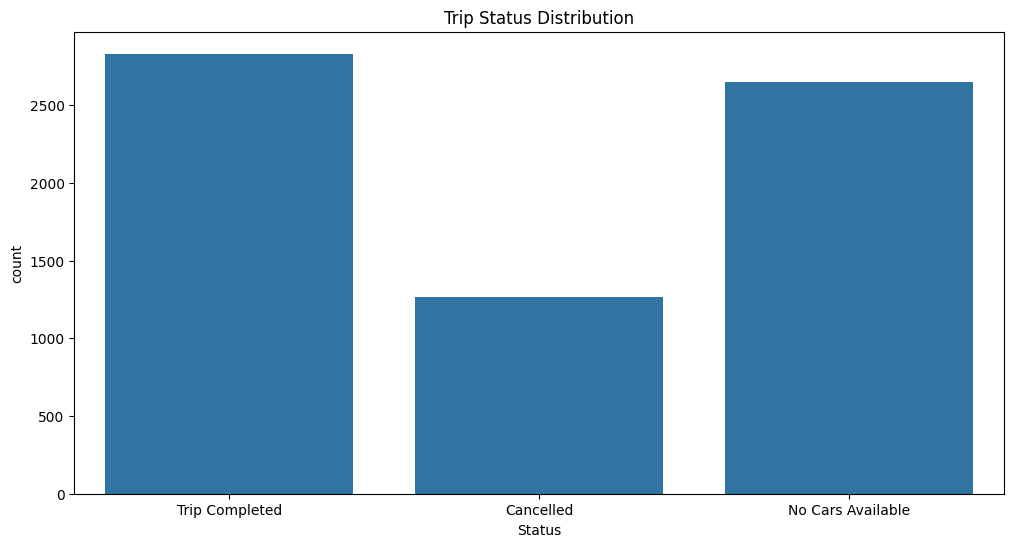

In [126]:
plt.figure(figsize=(12,6))
sns.countplot(data=uber, x='Status')
plt.title("Trip Status Distribution")
plt.show()

**Insights :**

* This status has the highest frequency, indicating a majority of users successfully booked and completed their trips.

**Box plot of Status by Hour**

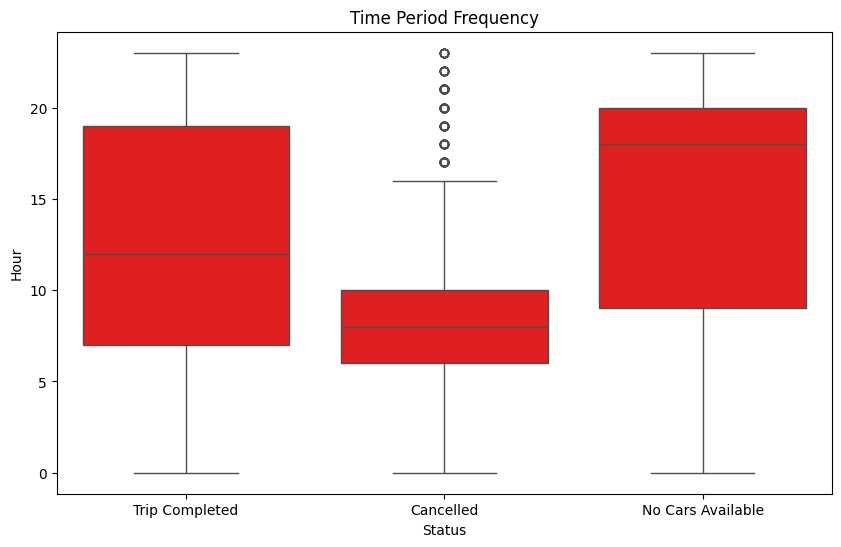

In [127]:
plt.figure(figsize=(10,6))
sns.boxplot(data=uber, x="Status", y= "Hour", color = "red")
plt.title("Time Period Frequency")
plt.show()

**Insights :**

* Trip Completed Median Hour is around 12 PM.
* Cancelled trip Median Hour is around 8 AM .Most cancellations occur between 6 AM and 11 AM. Several outliers appear beyond 17:00, possibly due to unexpected traffic

**Box plot of Hour by Pickup Point**

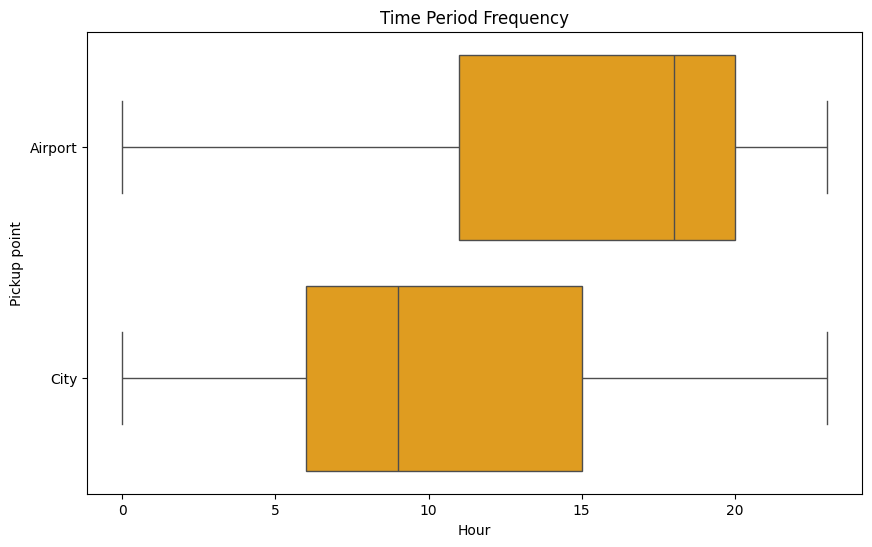

In [128]:
plt.figure(figsize=(10,6))
sns.boxplot(data=uber, x="Hour", y= "Pickup point", color = "orange")
plt.title("Time Period Frequency")
plt.show()

**Insights :**
* Airport Pickup Patterns Median hour 6PM to 7PM.
*  City Pickup Patterns Median hour is 9 AM

**KDE Plot by Pickup point by Hour**

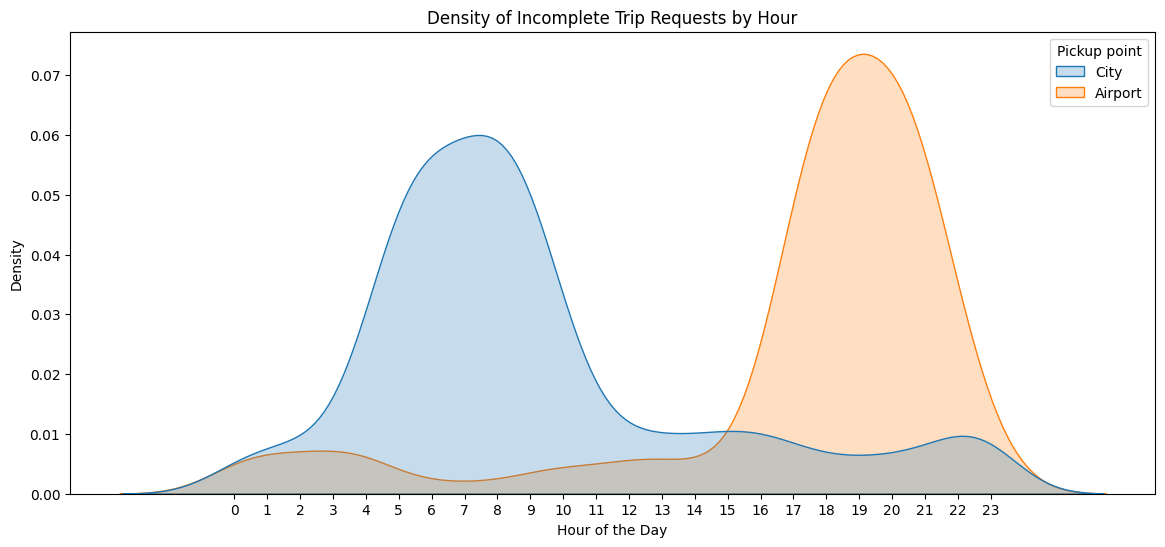

In [129]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=Incomplete, x="Hour", hue="Pickup point", fill=True)
plt.title("Density of Incomplete Trip Requests by Hour")
plt.xlabel("Hour of the Day")
plt.xticks(range(0,24))
plt.show()

**Insights :**

* This density plot shows the distribution of incomplete trip requests of  Cancelled or No Cars Available  by hour of the day, split between two pickup points: City and Airport.

* City Pickup – Morning Failures
The peak density of incomplete trips in the city occurs between 6 AM and 9 AM.

* The ASirport shows a dominant peak in incomplete trips between 6 PM and 9 PM

**KDE Plot of Hour by Status**

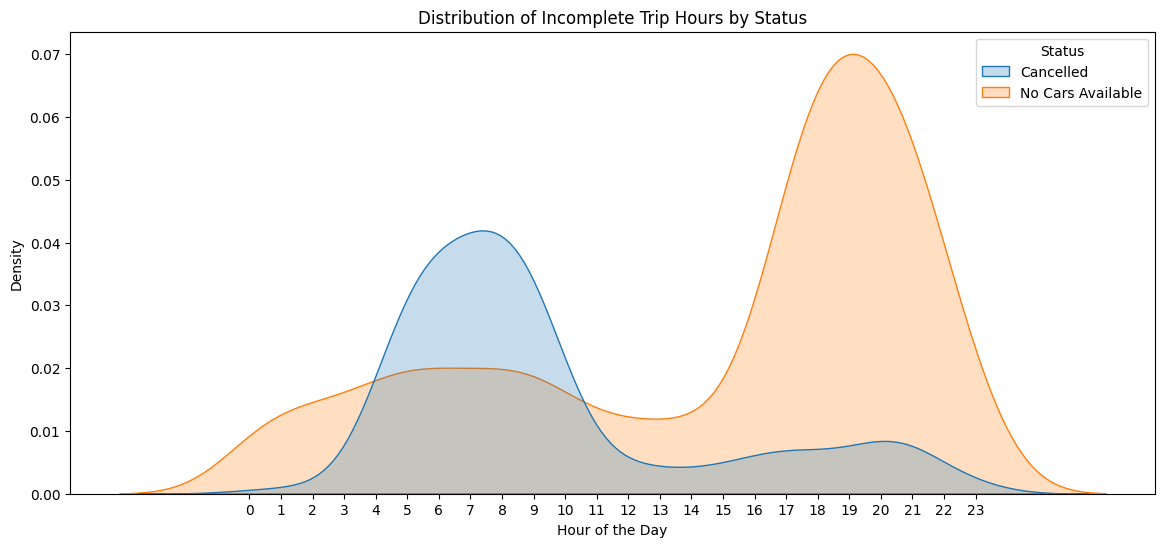

In [130]:
plt.figure(figsize=(14,6))
sns.kdeplot(data= Incomplete, x="Hour", hue="Status", fill=True)
plt.title("Distribution of Incomplete Trip Hours by Status")
plt.xlabel("Hour of the Day")
plt.xticks(range(0,24))
plt.show()

**Insights :**

* Cancelled Trips Peak Hour is 7 AM to 8 AM.
* No Cars Available Peak Hour is 7 AM to 8 PM.

Bar plot of Status

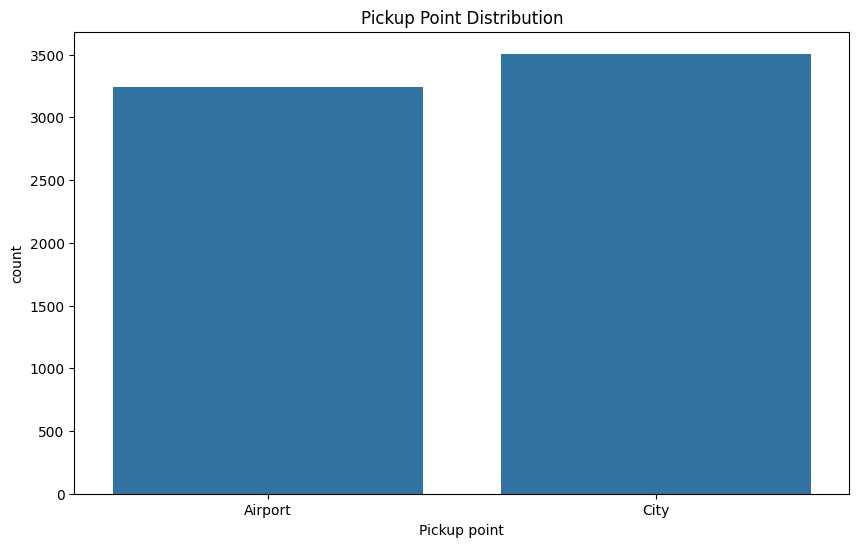

In [131]:
plt.figure(figsize=(10,6))
sns.countplot(data=uber, x='Pickup point')
plt.title("Pickup Point Distribution")
plt.show()

**Insights :**

* City has a slightly higher count than Airport.

**Bar plot of Time Peroid**

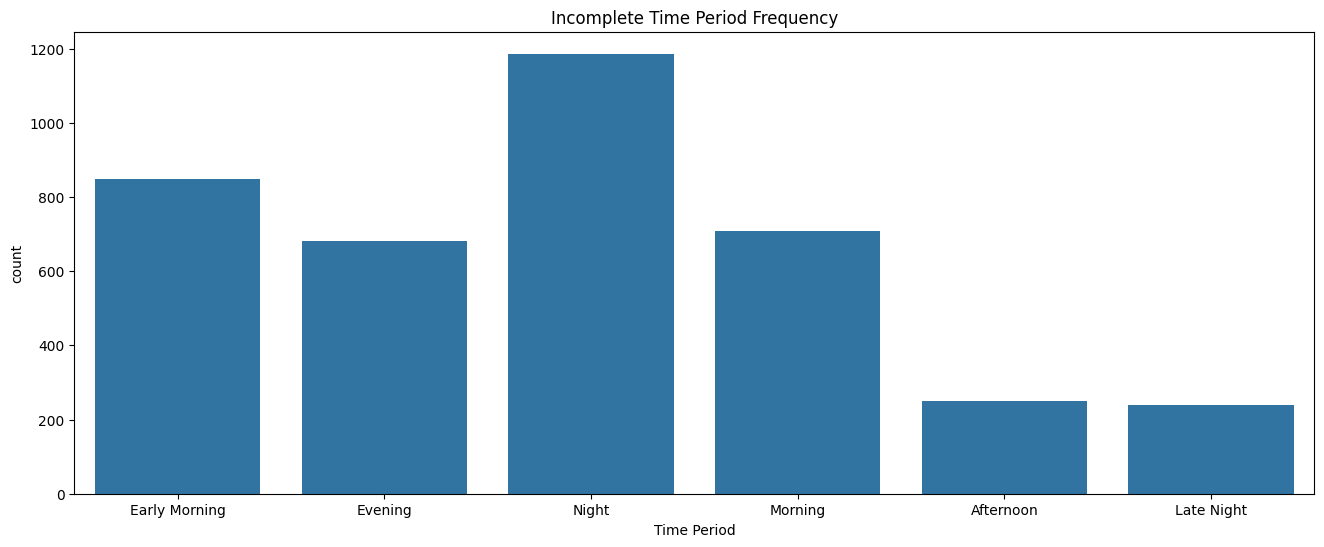

In [132]:
plt.figure(figsize=(16,6))
sns.countplot(data= Incomplete, x='Time Period')
plt.title("Incomplete Time Period Frequency")
plt.show()

**Insights :**

* Night has the most incomplete trips, with nearly 1,200 occurrences.
* Early Morning has 850+ incomplete trips.

**Bar Plot of Overall Time Period**

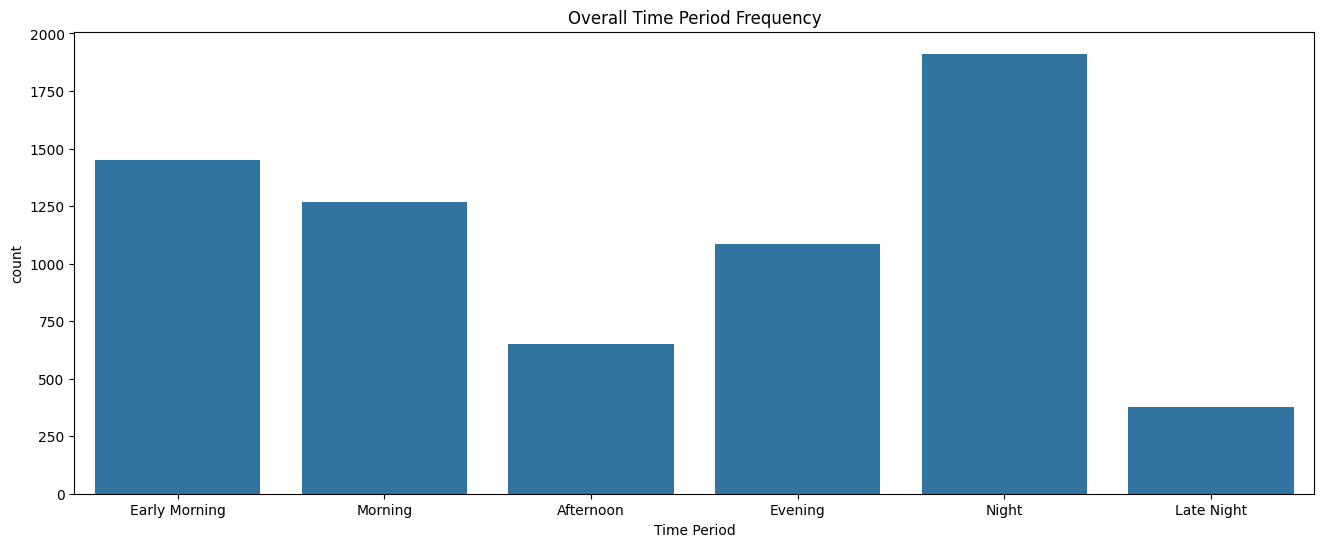

In [133]:
plt.figure(figsize=(16,6))
sns.countplot(data= uber, x='Time Period')
plt.title("Overall Time Period Frequency")
plt.show()

**Insights :**

* Night has the Highest demand trip requests.


**Line plot of No cars by Hour**

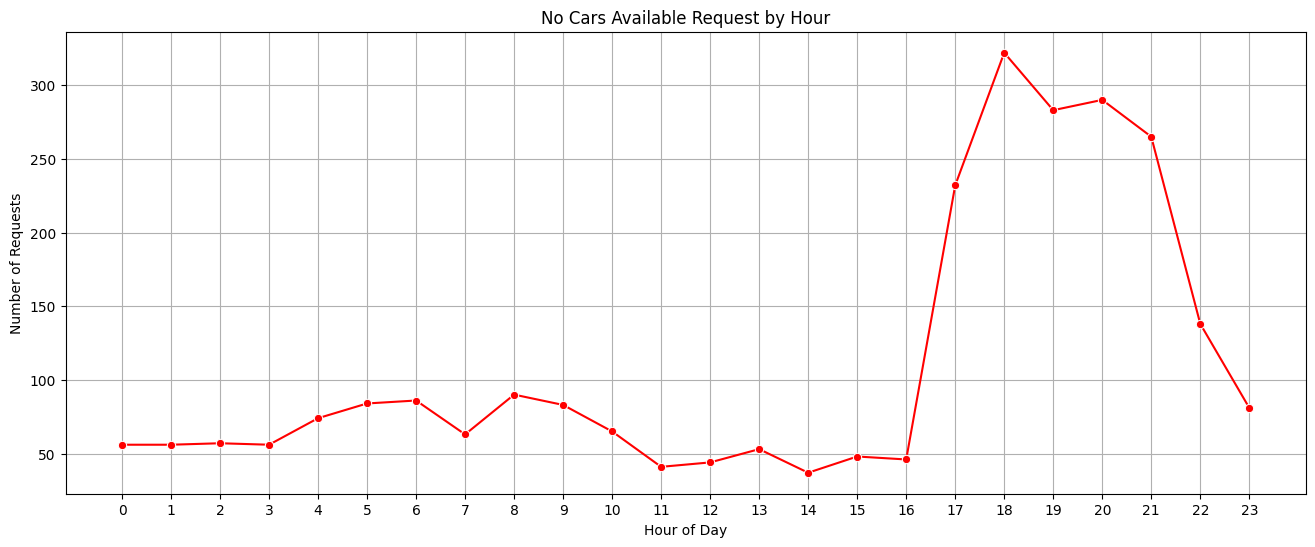

In [134]:
nocar = uber[uber["Status"]=="No Cars Available"]
nr = nocar.groupby(["Hour"]).agg({"Request id" : "count"}).reset_index()
plt.figure(figsize=(16, 6))
sns.lineplot(data= nr, x="Hour", y="Request id", color = "red", marker="o")
plt.title("No Cars Available Request by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


**Insights :**

* From 6 PM to 8 PM there peak time of No cars available.

In [135]:
cancel = uber[uber["Status"]=="Cancelled"]
can = cancel.groupby(["Time Period"]).agg({"Request id" : "count"}).reset_index()
can

,Time Period,Request id
0,Early Morning,541
1,Morning,430
2,Afternoon,69
3,Evening,81
4,Night,129
5,Late Night,14


**Line plot of Cancelled request by Hour**

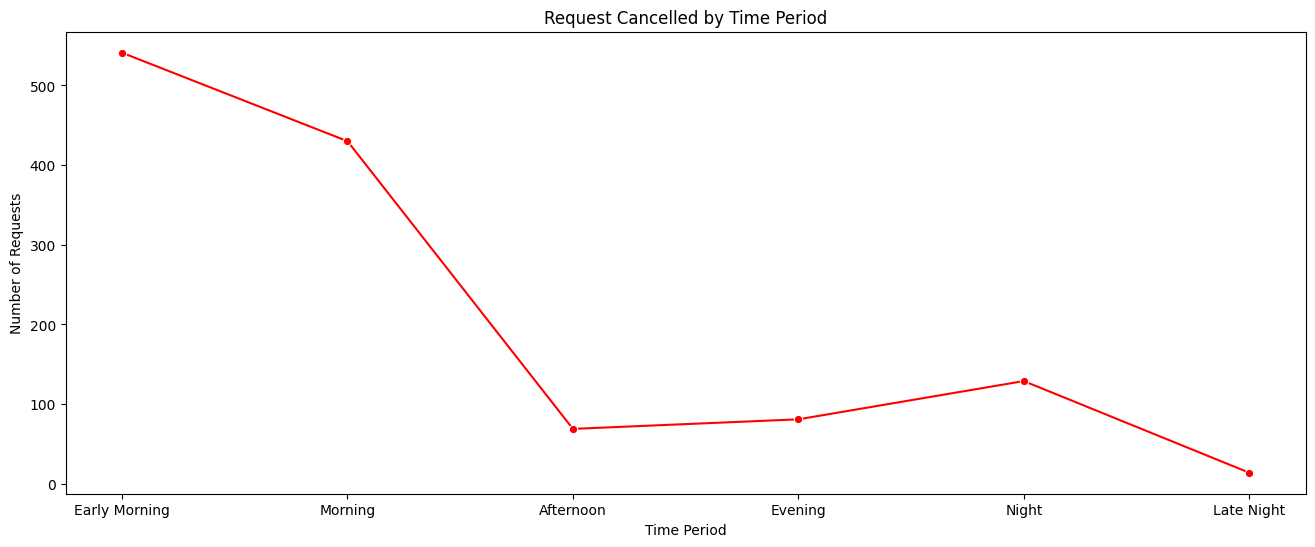

In [136]:
plt.figure(figsize=(16, 6))
sns.lineplot(data= can , x="Time Period", y="Request id", color = "red", marker="o")
plt.title("Request Cancelled by Time Period")
plt.xlabel("Time Period")
plt.ylabel("Number of Requests")
plt.show()

**Insights :**

* Early morning time period as highest number of Cancelled request.

In [137]:
d = uber.groupby(["Time Period","Status"]).agg({"Time Period" : "count"}).rename(columns={"Time Period" : "count"}).reset_index()
d

,Time Period,Status,count
0,Early Morning,Cancelled,541
1,Early Morning,No Cars Available,307
2,Early Morning,Trip Completed,604
3,Morning,Cancelled,430
4,Morning,No Cars Available,279
5,Morning,Trip Completed,559
6,Afternoon,Cancelled,69
7,Afternoon,No Cars Available,182
8,Afternoon,Trip Completed,400
9,Evening,Cancelled,81


**Comparision of Incomplete and Complete demand by Time Peroid.**

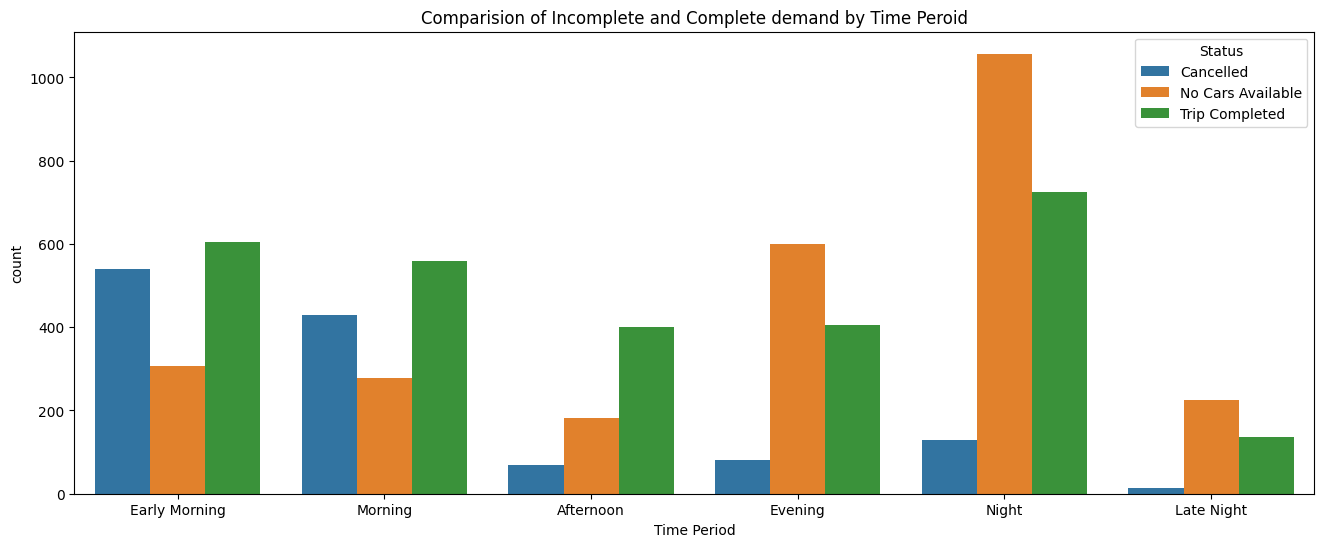

In [138]:
plt.figure(figsize=(16,6))
sns.barplot(data = d, x="Time Period", y= "count", hue ="Status" , palette= "tab10")
plt.title("Comparision of Incomplete and Complete demand by Time Peroid")
plt.show()

**Insights :**

* Night has Highest number of 'No Cars Available' requests (~1050), indicating severe supply shortage during this time.




**Comparision of Incomplete and Complete Demand by Hour**

In [139]:
d2 = uber.groupby(["Hour","Status"]).agg({"Hour" : "count"}).rename(columns={"Hour" : "count"}).reset_index()

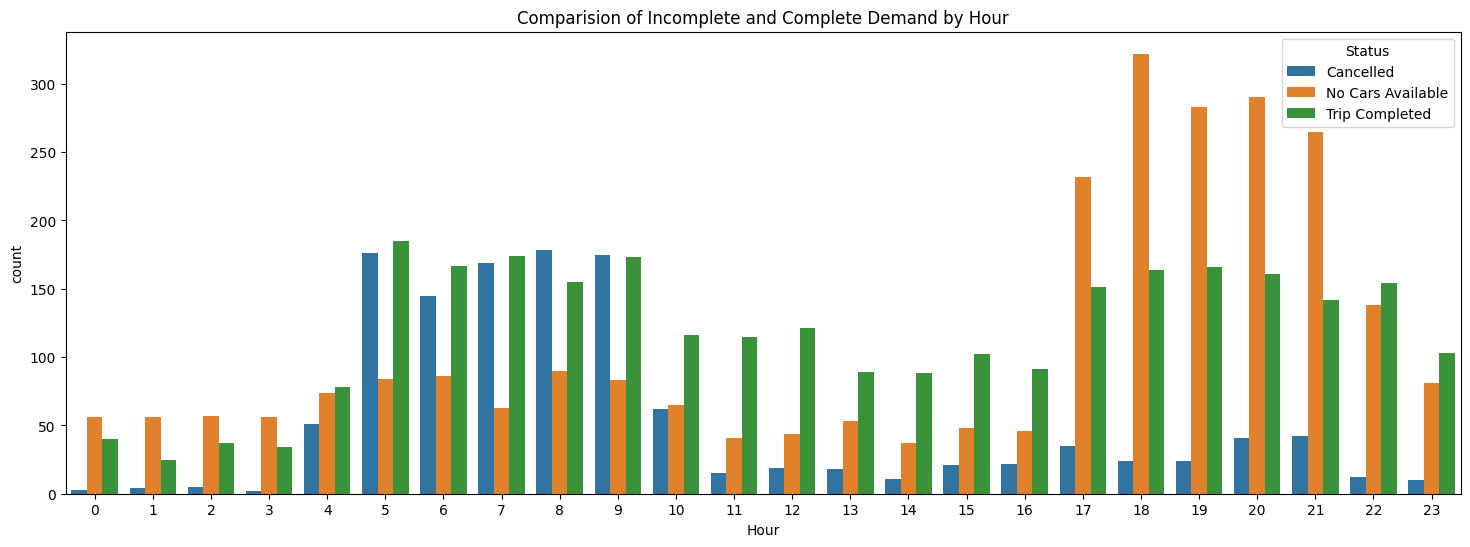

In [140]:
plt.figure(figsize=(18,6))
sns.barplot(data = d2, x="Hour",y= "count", hue ="Status" , palette= "tab10")
plt.title("Comparision of Incomplete and Complete Demand by Hour")
plt.show()

**Insights :**

*  Night (21–23 PM) Trip completions decrease, and “No Cars Available” still high.



**Pie chart of Pickup point by Request**

In [141]:
d8 = Incomplete.groupby(["Pickup point"]).agg({"Request id" : "count"}).reset_index()
d8

,Pickup point,Request id
0,Airport,1911
1,City,2003


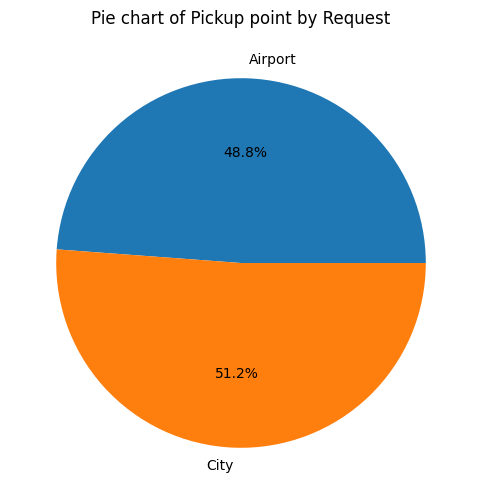

In [142]:
plt.figure(figsize=(12,6))
plt.pie(d8["Request id"], labels = d8["Pickup point"], autopct = "%1.1f%%")
plt.title("Pie chart of Pickup point by Request")
plt.show()

**Insights :**

*  Overall Pickup point for City has high demand.

**Column Chart for Maximum cancel request of Driver**

In [143]:
driver = uber[(uber["Status"]=="Cancelled") ]
driver1 = driver.groupby(["Driver id", "Status"]).agg({"Request id" : "count"}).rename(columns={"Request id" : "count"}).reset_index().sort_values(by="count", ascending = False).head(20)
driver1["Driver id"] = driver1["Driver id"].astype("str")

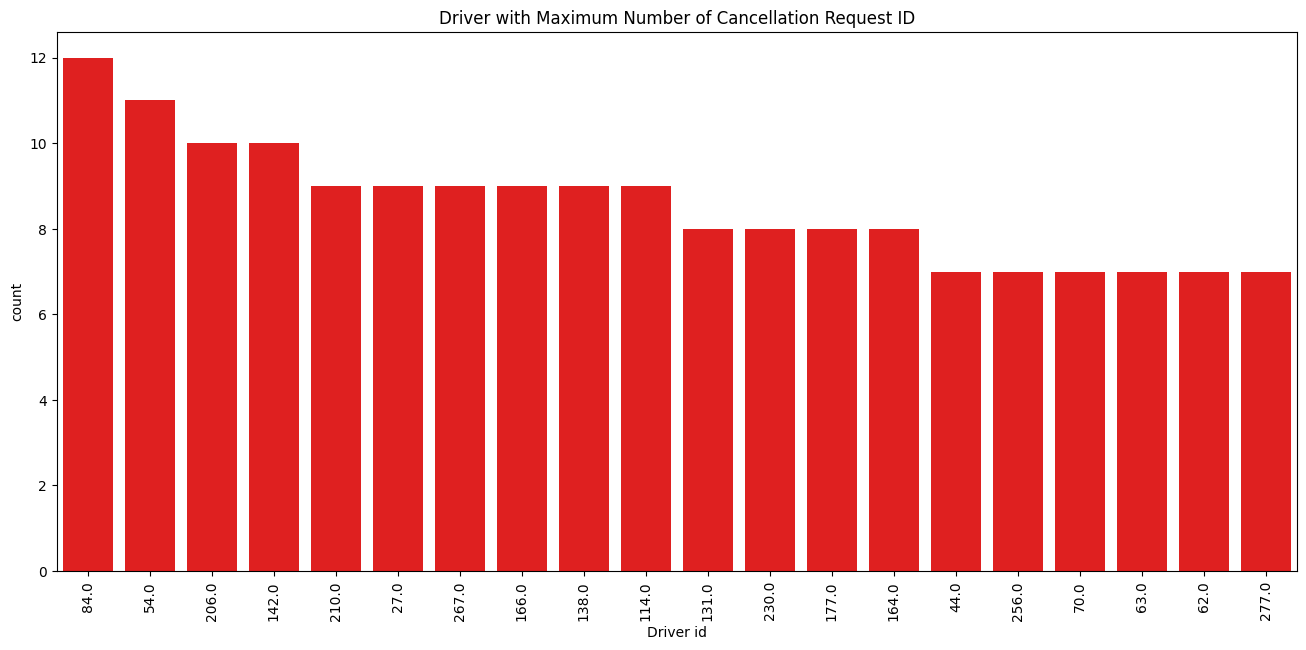

In [144]:
plt.figure(figsize=(16,7))
sns.barplot(data= driver1, x="Driver id", y="count", color = "red")
plt.title("Driver with Maximum Number of Cancellation Request ID")
plt.xticks(rotation = 90)
plt.show()

**Insights :**

*  Driver id with 84 has maximum cancel requests.

In [145]:
driver2 = uber[(uber["Status"]=="Trip Completed") ]
driver3 = driver2.groupby(["Driver id", "Status"]).agg({"Request id" : "count"}).rename(columns={"Request id" : "count"}).reset_index().sort_values(by="count", ascending = False).head(20)
driver3["Driver id"] = driver3["Driver id"].astype("str")

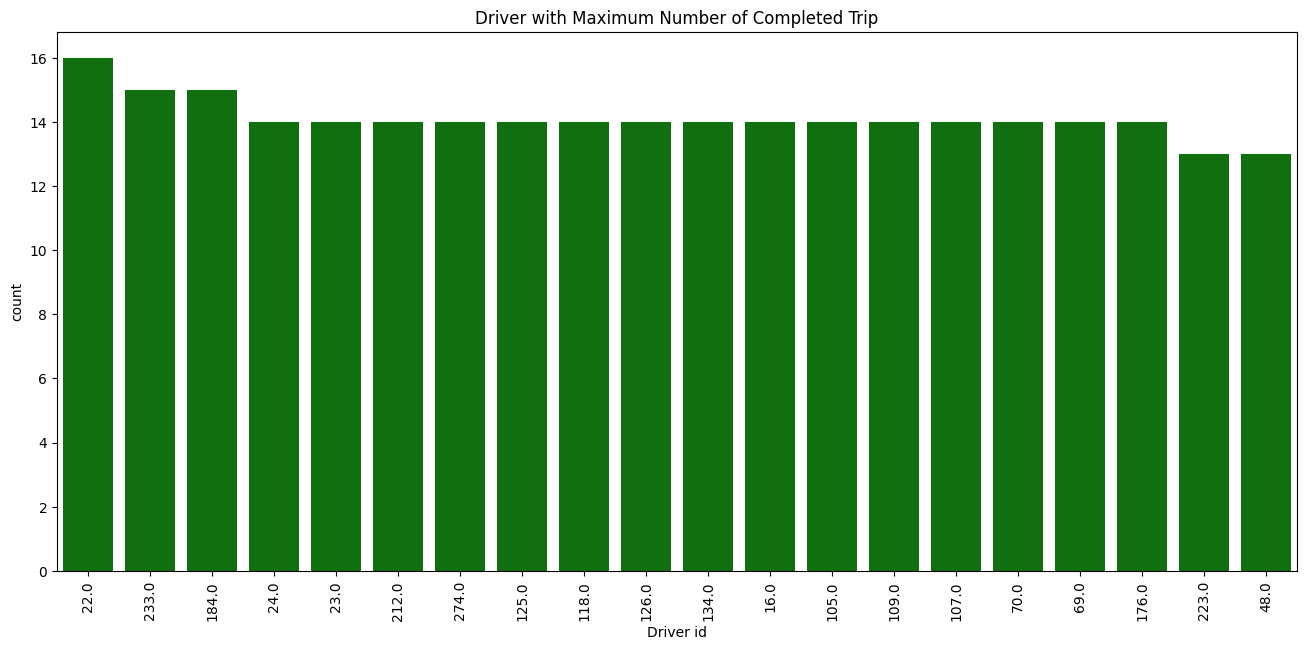

In [146]:
plt.figure(figsize=(16,7))
sns.barplot(data= driver3, x="Driver id", y="count", color = "green")
plt.title("Driver with Maximum Number of Completed Trip")
plt.xticks(rotation = 90)
plt.show()

**Insights :**

*  Driver id with 22 has maximum fulfilled requests trip.

In [147]:
driver4 = uber.groupby(["Driver id", "Status"]).agg({"Request id" : "count"}).rename(columns={"Request id" : "count"}).reset_index().head(200)

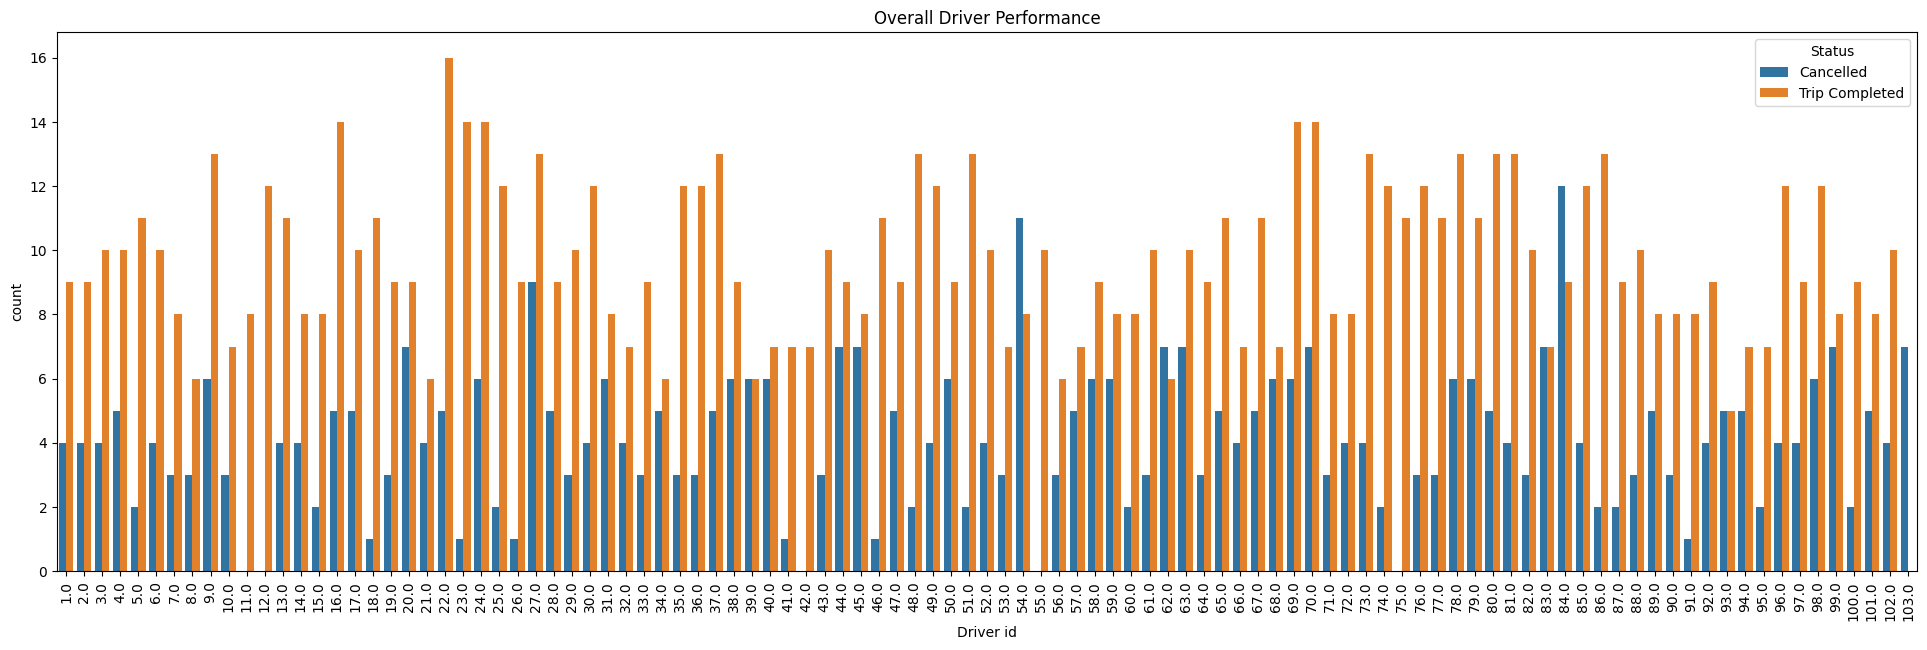

In [148]:
plt.figure(figsize=(24,7))
sns.barplot(data= driver4, x="Driver id", y="count", hue = "Status", palette = "tab10")
plt.title("Overall Driver Performance")
plt.xticks(rotation = 90)
plt.show()

**Insights :**

*  Driver id with 11,12, 42, 55, 75 has no cancel record in their history.

**Heatmap of trip by Status with Hour**

# **Multivariate Analysis**

Multivariate analysis refers to statistical techniques used to analyze more than two variables simultaneously to understand relationships, patterns, or impacts among them.

# **Correlation Heatmap**

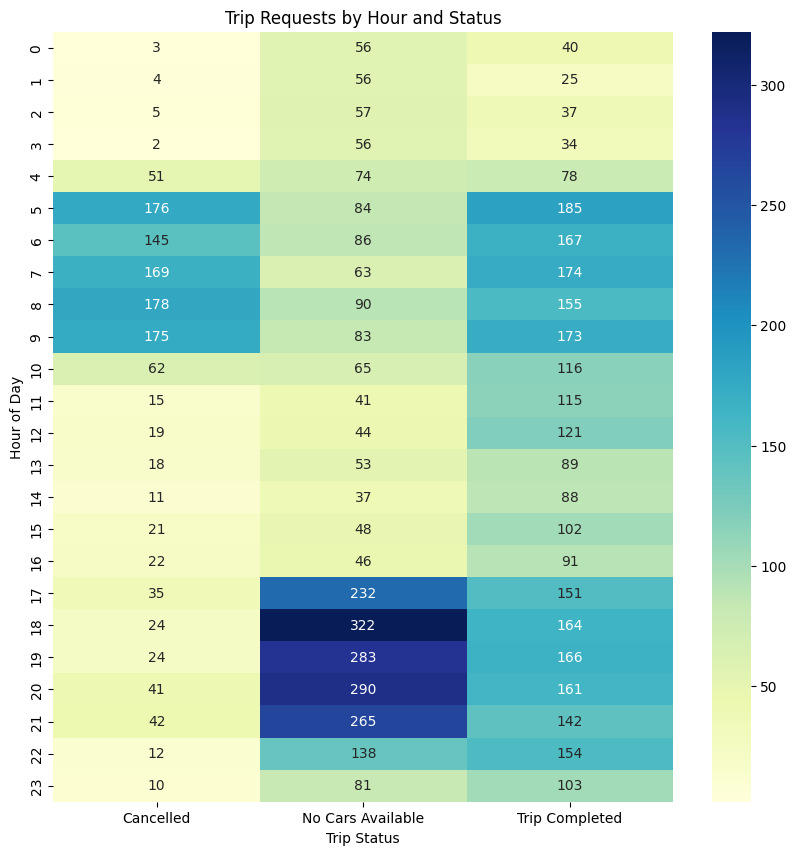

In [149]:
heat_data = uber.pivot_table(index='Hour', columns='Status', values='Request id', aggfunc='count')


plt.figure(figsize=(10, 10))
sns.heatmap(heat_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Trip Requests by Hour and Status")
plt.xlabel("Trip Status")
plt.ylabel("Hour of Day")
plt.show()

**Insights :**

*  No Car peak at 6PM.

**Heatmap of trip by Pickup point and Hour**

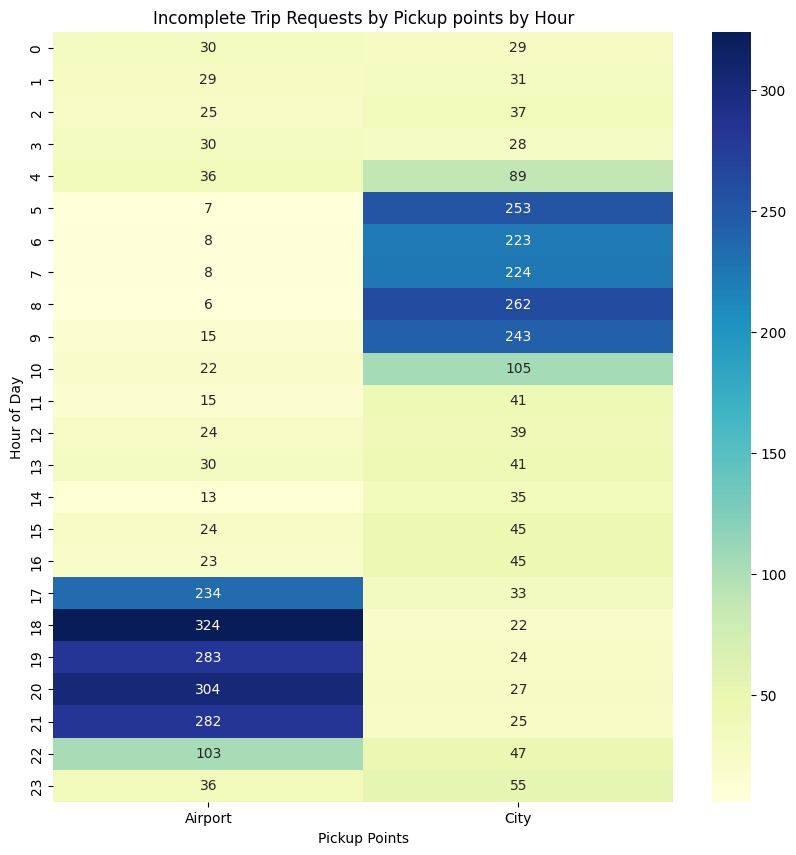

In [150]:
plt.figure(figsize=(10,10))
demand = pd.crosstab(Incomplete["Hour"], Incomplete["Pickup point"])
sns.heatmap(demand, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Incomplete Trip Requests by Pickup points by Hour")
plt.xlabel("Pickup Points")
plt.ylabel("Hour of Day")
plt.show()

**Insights :**

*  Incomplete Peak request for Airport at 6PM around 324 for City at 8AM around 262.

**Heatmap of Incomplete request by Pickup point and Time Period**

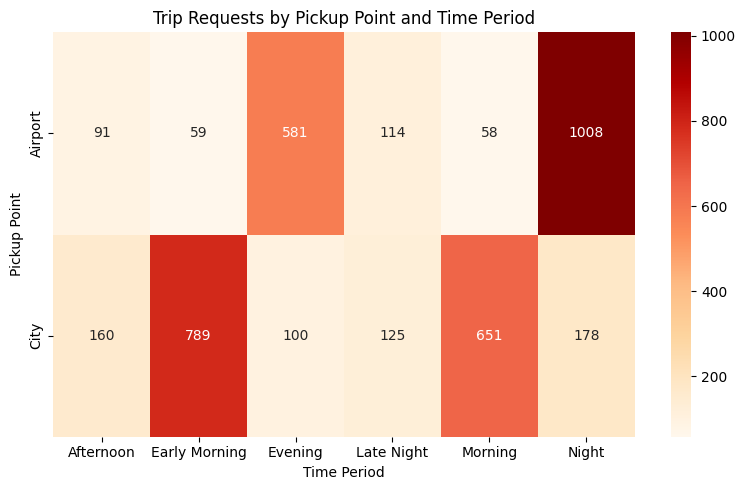

In [151]:
heat2 = Incomplete.pivot_table(index="Pickup point", columns="Time Period", values="Request id", aggfunc="count")

plt.figure(figsize=(8, 5))
sns.heatmap(heat2, annot=True, cmap="OrRd", fmt=".0f")
plt.title("Trip Requests by Pickup Point and Time Period")
plt.xlabel("Time Period")
plt.ylabel("Pickup Point")
plt.tight_layout()
plt.show()

**Insights :**

*  Incomplete Peak for Airport is Night and for City is Early Morning.

# **Pair Plots**

**Pair plot of Status with Driver id and Hour**

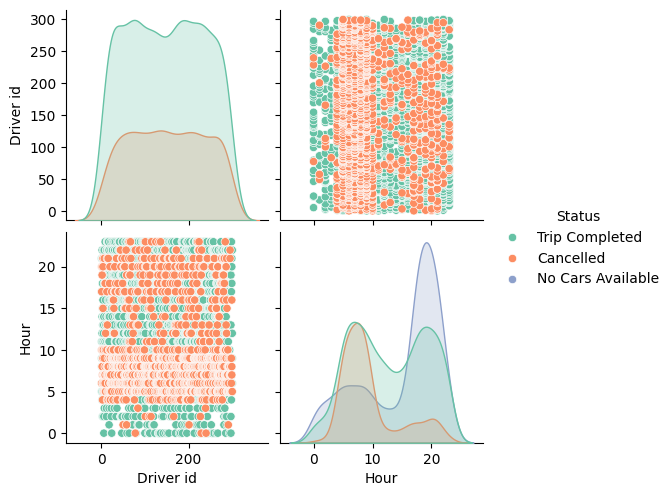

In [152]:
uber["Driver id"] = pd.to_numeric(uber["Driver id"], errors='coerce')
uber["Hour"] = pd.to_numeric(uber["Hour"], errors='coerce')


sns.pairplot(uber, vars=["Driver id", "Hour"], hue="Status", palette="Set2")
plt.show()


**Insights :**

*  Most drivers are completing trips, and cancellations are spread uniformly, meaning cancellation is not isolated to specific drivers.

* Two clear trip completion peaks:

Morning (around 7–9 AM)

Evening (around 18–20 PM)

* No Cars Available peaks heavily around 18–21 PM, indicating peak-hour supply shortfall.

* Cancelled trips are more concentrated in the early morning (5–9 AM).



## **Solution to Business Objective**

* Increase driver availability during Night and Early Morning by offering surge pricing or incentives.

* Shift scheduling can improve trip fulfillment and customer satisfaction in high-demand time slots.

* Encourage part-time drivers to cover low-supply, high-demand periods like Late Night.

* Use data-driven scheduling to balance trips between City and Airport zones for better coverage.

# **Conclusion**

Here is a comprehensive list of business-oriented conclusions drawn for Uber demand gap

* Night and Early Morning show peak demand but also face the highest number of incomplete trips, highlighting a major supply-demand gap.

* City pickup point slightly surpasses Airport in overall ride requests, indicating higher urban demand.

* Afternoon and Late Night periods show low activity, suggesting potential to optimize driver allocation and reduce idle time.

* Despite high ride volumes, driver unavailability during peak hours leads to missed revenue opportunities.